# Regression model-predicts pricing of the house

In [904]:
#The solution is divided into following sections
# 1. Data understanding and Cleaning
# 2. Data Preparation 
# 3 Model Building 
# 4. Observation and Inference

In [996]:
# Import the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Ignore warnings.
import warnings
warnings.filterwarnings('ignore') 

In [906]:
# Read the data into a dataframe
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [907]:
#DATA UNDERSTANDING AND CLEANING

In [908]:
#Determing the columns having single value columns.
data.nunique().sort_values()

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

In [909]:
data.shape

(1460, 81)

In [910]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [911]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [912]:
# DATA CLEANING
# 1. NullValues
# 2. Outliers
# 3. Streamlining field values



In [913]:
print(round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending=False))# Determing the percentage of  Null values. 

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64


In [914]:
#dropping colums with high null value
data.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace= True)

In [915]:
data.drop("Id",axis=1,inplace= True)#Removing the id as it doesnt have impact

In [916]:
null=round(100*(data.isna().sum()/len(data)),2).sort_values(ascending=False)
null = null[null>0]
null

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [917]:
#Input missing values
data['MasVnrArea'].fillna(data['MasVnrArea'].median,inplace= True)
#As per data dictionary NA is valid value as "No Garage"
#As per data dictionary for MasVnrType NA is None
#As per data dictionary for MasVnrType NA for Basement and actual value is No basement.
data['GarageType'].fillna("No Garage",inplace= True)
data['GarageFinish'].fillna("No Garage",inplace= True)
data['GarageQual'].fillna("No Garage",inplace= True)
data['GarageCond'].fillna("No Garage",inplace= True)
data['MasVnrType'].fillna("None",inplace= True)
data['BsmtFinType1'].fillna("No Basement",inplace= True)
data['BsmtFinType2'].fillna("No Basement",inplace= True)
data['BsmtExposure'].fillna("No Basement",inplace= True)
data['BsmtQual'].fillna("No Basement",inplace= True)
data['BsmtCond'].fillna("No Basement",inplace= True)
data['Electrical'].fillna("SBrkr",inplace= True)

In [918]:
data['LotFrontage']= pd.to_numeric(data['LotFrontage'],errors='coerce')
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median()).astype('int32')
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'], errors='coerce').fillna(0).astype(int)

In [919]:
#Dropping little variance fields and highly skweed

In [920]:
data['SaleType'].describe()

count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object

In [921]:
data['PavedDrive'].describe()

count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object

In [922]:
data['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

In [923]:
data['Electrical'].describe()

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object

In [924]:
data['ExterCond'].describe()

count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object

In [925]:
data['Condition1'].describe()

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object

In [926]:
data['LandContour'].describe()

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

<Figure size 2000x2000 with 0 Axes>

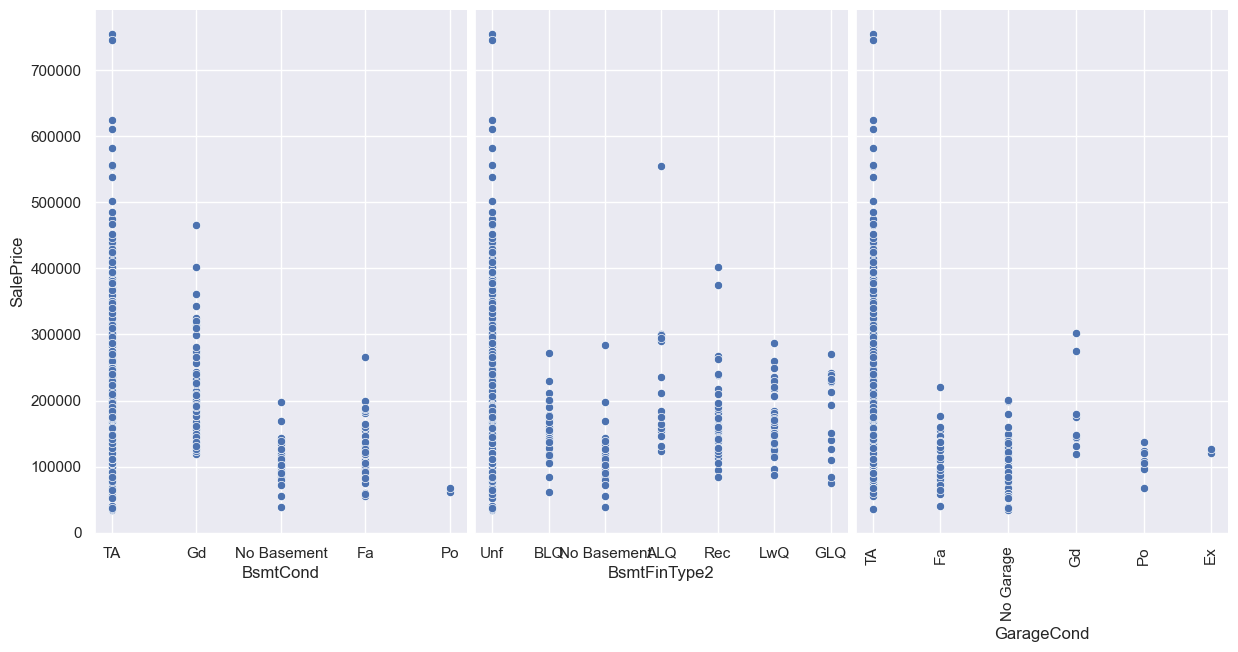

In [927]:
sns.set()
plt.figure(figsize = (20,20))
sns.pairplot(x_vars=['BsmtCond','BsmtFinType2','GarageCond'],y_vars='SalePrice',data=data,size=6, aspect=0.7)
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x2000 with 0 Axes>

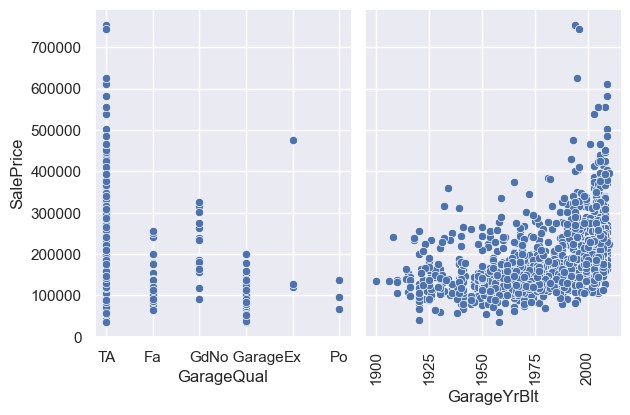

In [928]:
sns.set()
plt.figure(figsize = (20,20))
sns.pairplot(x_vars=['GarageQual','GarageYrBlt'],y_vars='SalePrice',data=data,size=4, aspect=0.8)
plt.xticks(rotation=90)
plt.show()

In [929]:
data.drop(['LandContour','BsmtCond','BsmtFinType2','GarageCond','GarageQual','GarageYrBlt','SaleType','PavedDrive','CentralAir','Electrical','ExterCond','Condition1'],axis=1,inplace= True)

In [930]:
data.shape

(1460, 63)

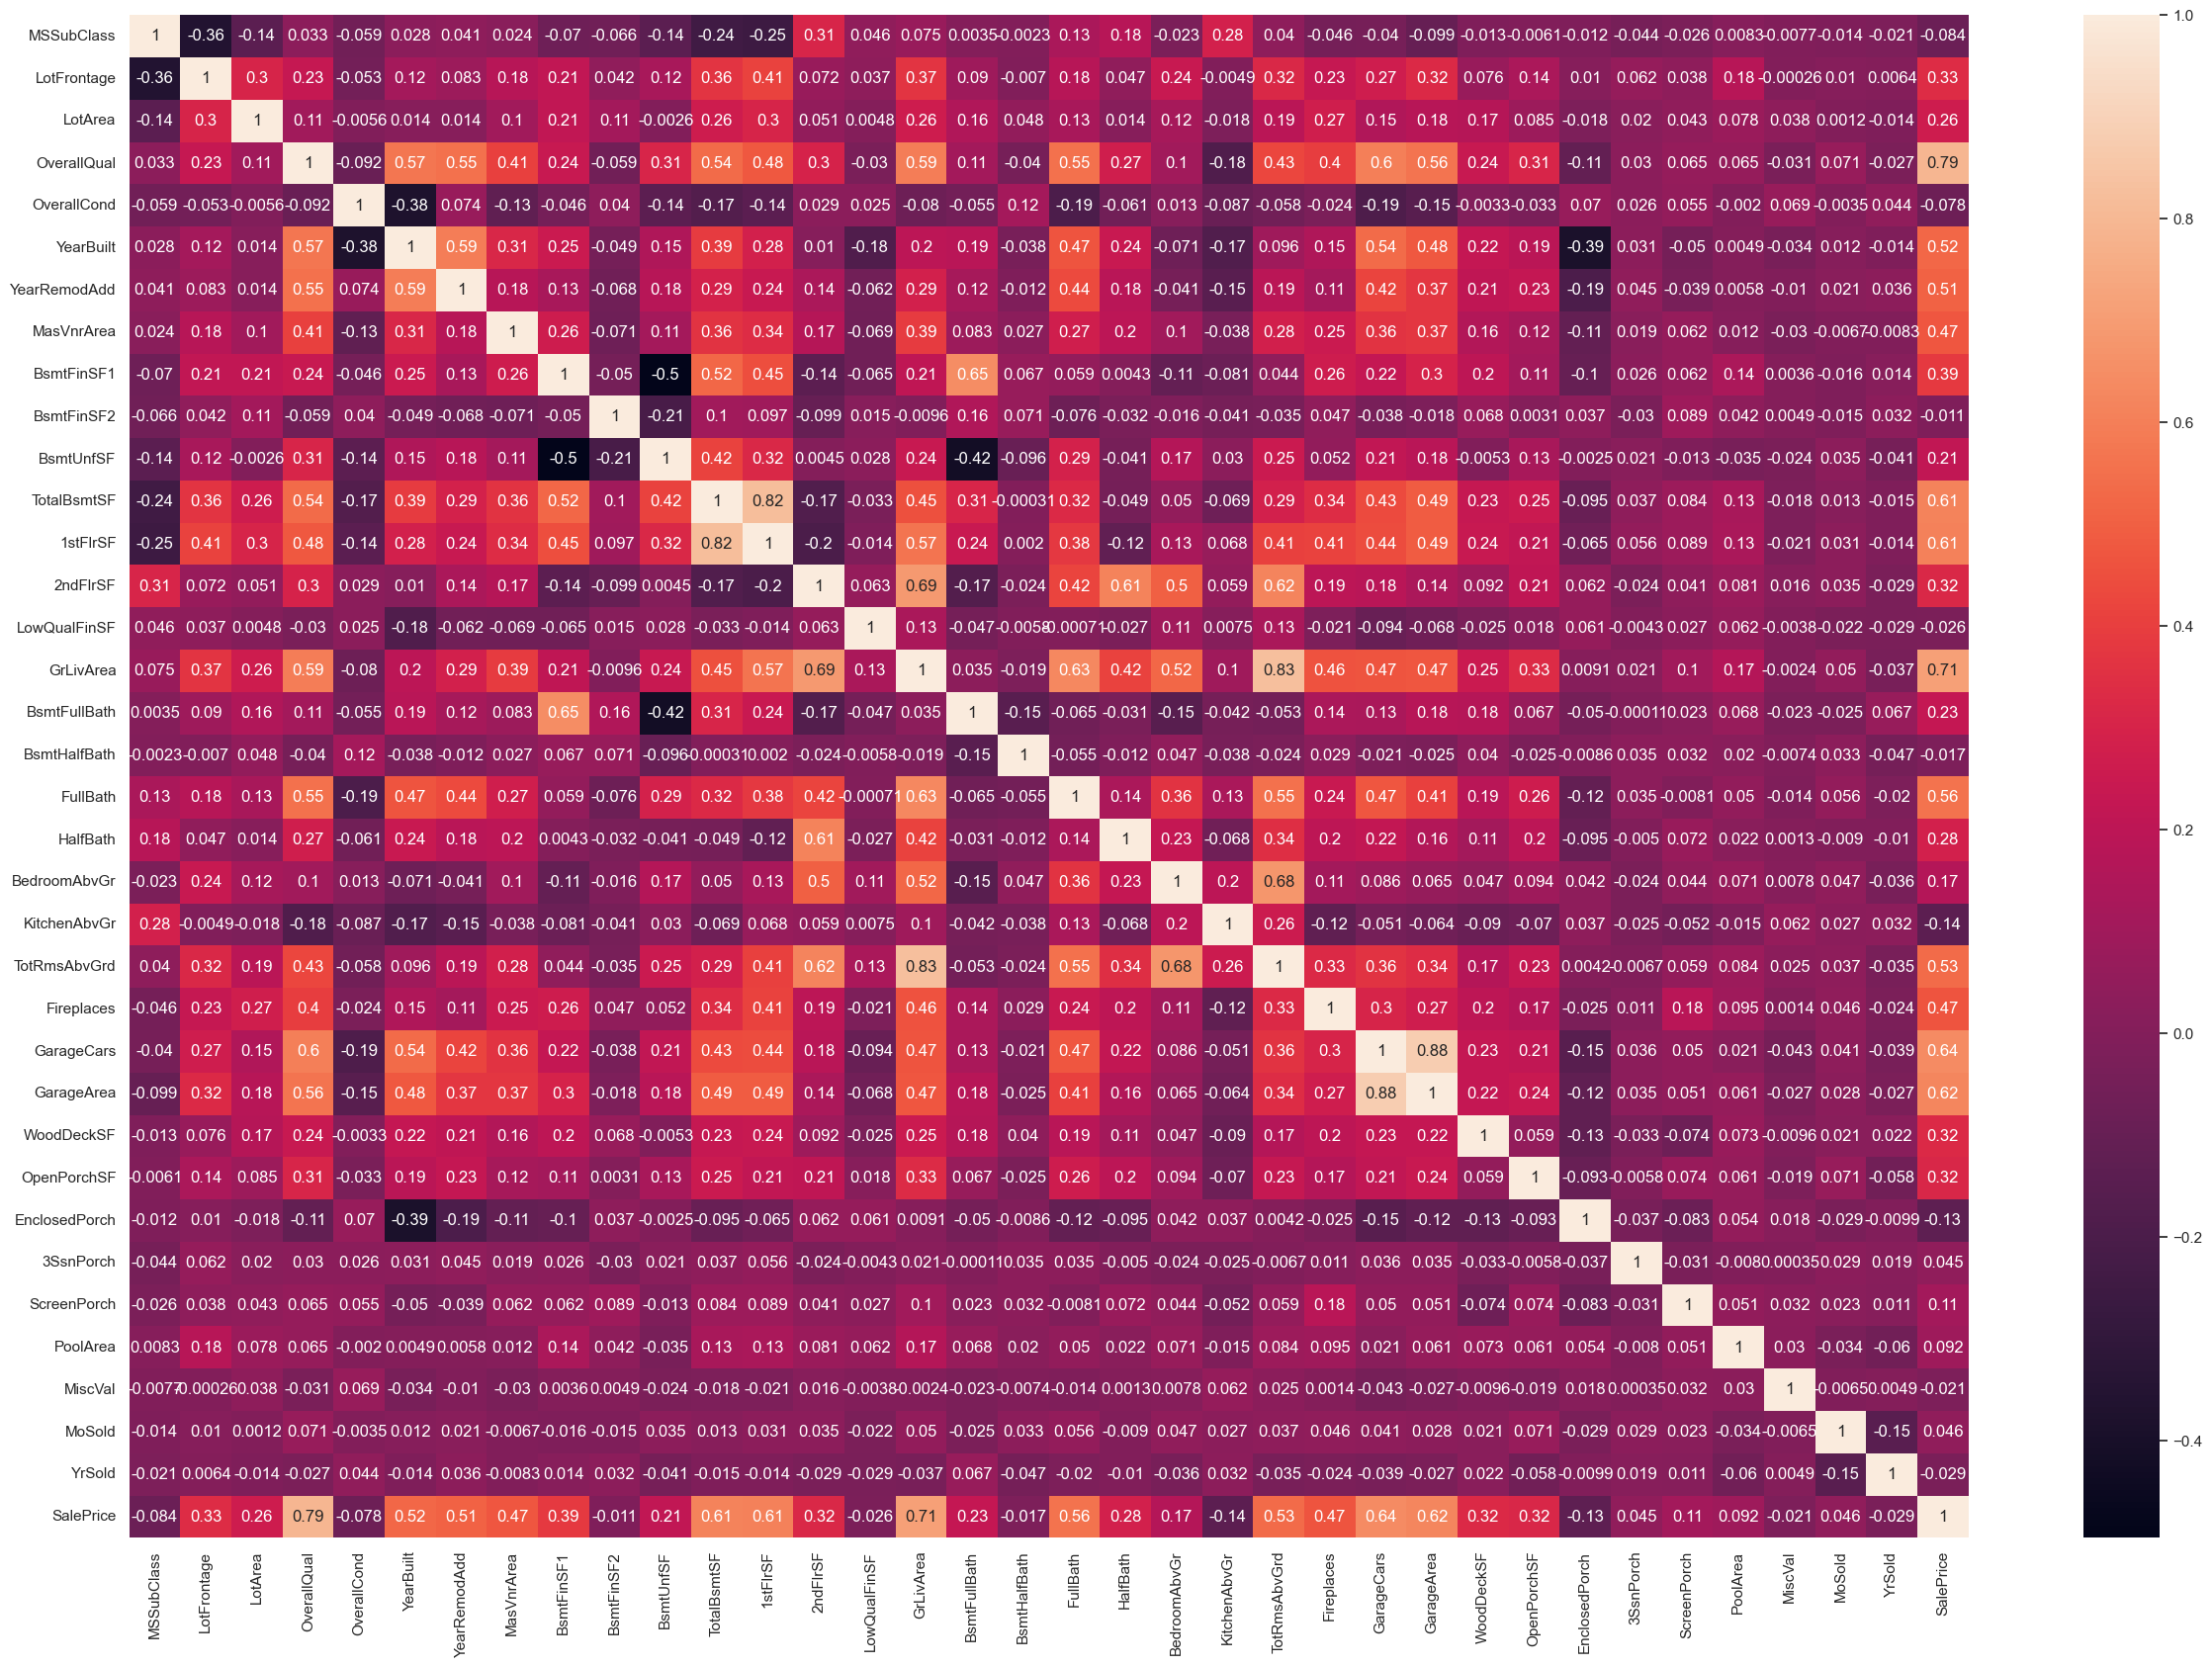

In [931]:
plt.figure(figsize = (30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [932]:
#From above corelation matrix Salesprice is strongly corelated to 
    #Overall Quality- Good quality house would fetch higher price
    #GrLivArea- More the area above ground floor, greater the price
    #YearBuilt,Yearemodelled,1stFlrSqft,Fullbath,TotRmsAbvGrd,
    #GarageCars,garageArea 

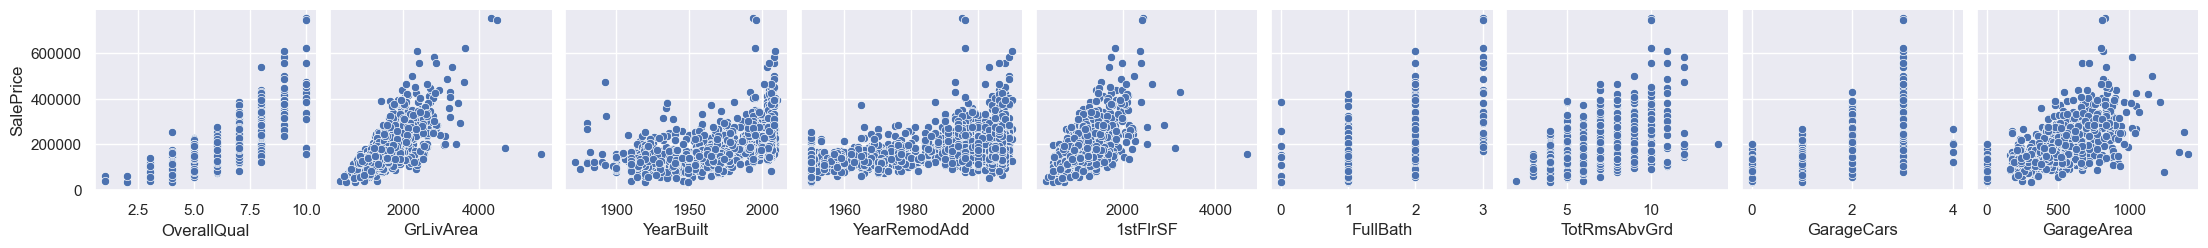

In [933]:
sns.set()
cols= ['OverallQual','GrLivArea','YearBuilt','YearRemodAdd','1stFlrSF','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']
sns.pairplot(x_vars=cols,y_vars='SalePrice',data=data)
plt.show()

In [934]:
#Drop Columns that are corelated and contributing to SalePrice

In [935]:
data.drop(['GarageCars','FullBath'],axis=1,inplace= True)
data.shape

(1460, 61)

In [936]:
#Determing the columns having little variance
data.nunique().sort_values()
data.drop(['MiscVal','RoofMatl','Condition2','Heating','Functional','Street','Utilities'],axis=1,inplace= True)

In [937]:
#DATA PREPARATION

In [938]:
#Categorical variables

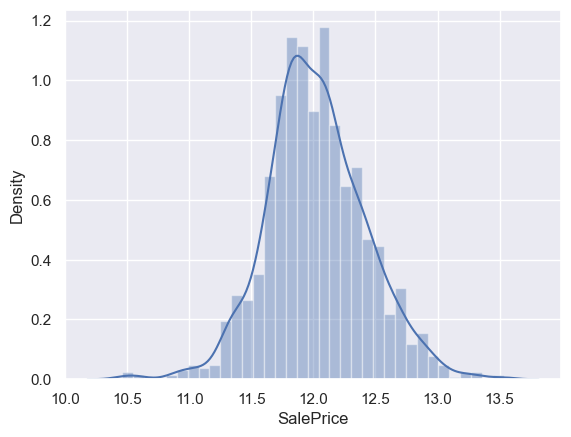

In [939]:
#treating skewness of Saleprice
sns.set
data.SalePrice=np.log(data.SalePrice)
sns.distplot(data.SalePrice)
plt.show()

In [940]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int32  
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [951]:
y=data['SalePrice']


In [943]:
category= data.select_dtypes(include=['object'])
category.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')

In [944]:
categorical_dummies=pd.get_dummies(category,drop_first=True)
categorical_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [967]:
num= data.select_dtypes(include=['int64','int32'])

In [962]:
housing_data=pd.concat([num,categorical_dummies],axis=1)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 160 entries, MSSubClass to SaleCondition_Partial
dtypes: int32(1), int64(31), uint8(128)
memory usage: 541.9 KB


In [950]:
# Train-Test Split

In [958]:

housing_train,housing_test,y_train,y_test=train_test_split(housing_data,y,train_size=0.7,random_state=100)

In [963]:
from sklearn.preprocessing import MinMaxScaler

In [970]:
scaler = MinMaxScaler()
continous=num.columns

In [972]:
housing_data[continous]== scaler.fit_transform(housing_data[continous])
housing_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,0.265068,0.055479,0.055479,0.289041,0.414384,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,0.441521,0.228992,0.228992,0.453472,0.492784,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [973]:
# Model Building

In [975]:
#Ridge Regression

In [984]:
ridge_params={'alpha':[0.00004,0.0001,0.001,0.01,0.1,10,100,1000]}
ridge=Ridge()
folds=5
model_cv=GridSearchCV(estimator=ridge,param_grid=ridge_params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(housing_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [986]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023868,0.032791,0.004102,0.000808,0.00004,{'alpha': 4e-05},0.860381,0.740047,0.811199,0.878492,...,0.836571,0.055569,6,0.919287,0.932792,0.928140,0.913992,0.911475,0.921137,0.008157
1,0.006598,0.000722,0.003383,0.000805,0.0001,{'alpha': 0.0001},0.860382,0.740047,0.811201,0.878497,...,0.836573,0.055570,5,0.919287,0.932792,0.928140,0.913992,0.911475,0.921137,0.008157
2,0.007192,0.001349,0.002864,0.000026,0.001,{'alpha': 0.001},0.860406,0.740051,0.811232,0.878567,...,0.836605,0.055585,4,0.919287,0.932792,0.928140,0.913992,0.911475,0.921137,0.008157
3,0.006147,0.000275,0.002927,0.000119,0.01,{'alpha': 0.01},0.860624,0.740090,0.811529,0.879252,...,0.836918,0.055732,3,0.919285,0.932791,0.928138,0.913990,0.911474,0.921135,0.008157
4,0.005880,0.000045,0.002897,0.000120,0.1,{'alpha': 0.1},0.862215,0.740243,0.813847,0.884820,...,0.839355,0.056978,2,0.919198,0.932707,0.928040,0.913869,0.911373,0.921038,0.008166


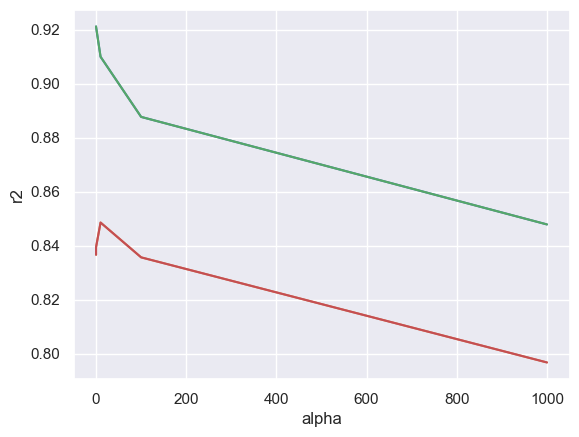

In [988]:
#plot
cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.show()

In [1032]:
#optimum alpha 100
ridge=Ridge(100)
ridge.fit(housing_train,y_train)
ridge.coef_

array([-6.20010813e-04, -4.47636881e-04,  1.84781063e-06,  6.80894574e-02,
        3.80277743e-02,  2.39123609e-03,  1.52833344e-03,  6.81099421e-06,
        1.42647338e-05,  2.16901507e-05,  8.63475150e-06,  4.45896364e-05,
        5.71101708e-05,  7.51347421e-05,  1.65107735e-05,  1.48755687e-04,
        3.65014433e-02,  3.63546470e-03,  9.65776249e-03,  9.62864185e-03,
       -1.05276717e-02,  1.08555547e-02,  3.74278933e-02,  2.02618871e-04,
        1.20863232e-04, -7.87008998e-05,  1.57628402e-04,  2.41847041e-04,
        2.81205232e-04, -7.54903734e-04, -4.78327952e-04, -8.23435844e-03,
        1.62620698e-02,  2.01687584e-03,  2.57572159e-02, -2.10605251e-02,
        5.25827368e-03, -1.37936616e-02, -8.61593762e-04,  1.37567186e-02,
       -5.39077802e-03, -4.90410614e-04, -1.28793392e-03,  1.19492137e-02,
       -1.00496419e-05, -2.08021508e-04, -7.80683470e-03,  1.07169139e-02,
        1.30262002e-02, -1.36071407e-02,  3.41470502e-02, -3.52067545e-02,
       -6.69160583e-03, -

In [1033]:
ridge.score(housing_train,y_train)

0.8859793223715523

In [1034]:
ridge.score(housing_test,y_test)

0.8690374447358562

In [1035]:
from sklearn.metrics import r2_score
y_train_pred=ridge.predict(housing_train)
r2_score(y_train,y_train_pred)

0.8859793223715523

In [1036]:
y_test_pred=ridge.predict(housing_test)
r2_score(y_test,y_test_pred)

0.8690374447358562

In [1037]:
#Lasso Regression

In [1038]:
lasso_params= { 'alpha':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,6.0,10.0,20]}
lasso=Lasso()

In [1039]:
folds=5
model_cv=GridSearchCV(estimator=lasso,param_grid=lasso_params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(housing_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 6.0, 10.0, 20]},
             return_train_score=True, scoring='r2', verbose=1)

In [1040]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029270,0.003891,0.003605,0.000843,0.3,{'alpha': 0.3},0.819519,0.527266,0.723502,0.828700,...,0.750580,0.120112,1,0.785209,0.830439,0.809119,0.784276,0.771554,0.796119,0.021022
1,0.022983,0.005868,0.003464,0.000802,0.4,{'alpha': 0.4},0.821823,0.519880,0.721803,0.826877,...,0.748533,0.122695,2,0.782157,0.827991,0.806307,0.781304,0.768324,0.793217,0.021281
2,0.022519,0.006807,0.002922,0.000086,0.5,{'alpha': 0.5},0.822605,0.512603,0.719402,0.825559,...,0.746040,0.125062,3,0.778299,0.825466,0.802705,0.778481,0.764686,0.789927,0.021585
3,0.025255,0.007369,0.003845,0.001029,0.6,{'alpha': 0.6},0.822584,0.504825,0.716374,0.823618,...,0.742997,0.127442,4,0.774608,0.822379,0.798863,0.775032,0.761056,0.786388,0.021728
4,0.028181,0.009861,0.005684,0.001329,0.7,{'alpha': 0.7},0.821648,0.498729,0.712762,0.821071,...,0.739776,0.128956,5,0.770307,0.819352,0.794686,0.771028,0.756769,0.782428,0.022131


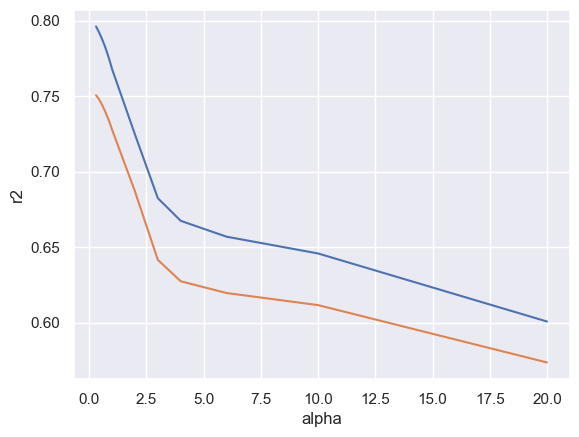

In [1041]:
#plot
cv_results['param_alpha']=cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.show()

In [1278]:
#Optimum alpha = 3
lasso=Lasso(0.005)
lasso.fit(housing_train,y_train)
ridge.coef_

array([-6.20010813e-04, -4.47636881e-04,  1.84781063e-06,  6.80894574e-02,
        3.80277743e-02,  2.39123609e-03,  1.52833344e-03,  6.81099421e-06,
        1.42647338e-05,  2.16901507e-05,  8.63475150e-06,  4.45896364e-05,
        5.71101708e-05,  7.51347421e-05,  1.65107735e-05,  1.48755687e-04,
        3.65014433e-02,  3.63546470e-03,  9.65776249e-03,  9.62864185e-03,
       -1.05276717e-02,  1.08555547e-02,  3.74278933e-02,  2.02618871e-04,
        1.20863232e-04, -7.87008998e-05,  1.57628402e-04,  2.41847041e-04,
        2.81205232e-04, -7.54903734e-04, -4.78327952e-04, -8.23435844e-03,
        1.62620698e-02,  2.01687584e-03,  2.57572159e-02, -2.10605251e-02,
        5.25827368e-03, -1.37936616e-02, -8.61593762e-04,  1.37567186e-02,
       -5.39077802e-03, -4.90410614e-04, -1.28793392e-03,  1.19492137e-02,
       -1.00496419e-05, -2.08021508e-04, -7.80683470e-03,  1.07169139e-02,
        1.30262002e-02, -1.36071407e-02,  3.41470502e-02, -3.52067545e-02,
       -6.69160583e-03, -

In [1279]:
lasso.score(housing_train,y_train)

0.8643534108432621

In [1280]:
lasso.score(housing_test,y_test)

0.8556628802027817

In [1281]:
#Coefficient and Evaluation

In [ ]:
#Ridge parameters

In [1284]:
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0,ridge.intercept_)
model_parameters=[round(x,2) for x in model_parameters]
cols=housing_data.columns
cols=cols.insert(0,"constant")
list((zip(cols,model_parameters)))

[('constant', 19.61),
 ('MSSubClass', -0.04),
 ('LotFrontage', -0.02),
 ('LotArea', -0.02),
 ('OverallQual', -0.02),
 ('OverallCond', -0.02),
 ('YearBuilt', -0.02),
 ('YearRemodAdd', -0.02),
 ('MasVnrArea', -0.01),
 ('BsmtFinSF1', -0.01),
 ('BsmtFinSF2', -0.01),
 ('BsmtUnfSF', -0.01),
 ('TotalBsmtSF', -0.01),
 ('1stFlrSF', -0.01),
 ('2ndFlrSF', -0.01),
 ('LowQualFinSF', -0.01),
 ('GrLivArea', -0.01),
 ('BsmtFullBath', -0.01),
 ('BsmtHalfBath', -0.01),
 ('HalfBath', -0.01),
 ('BedroomAbvGr', -0.01),
 ('KitchenAbvGr', -0.01),
 ('TotRmsAbvGrd', -0.01),
 ('Fireplaces', -0.01),
 ('GarageArea', -0.01),
 ('WoodDeckSF', -0.01),
 ('OpenPorchSF', -0.01),
 ('EnclosedPorch', -0.01),
 ('3SsnPorch', -0.01),
 ('ScreenPorch', -0.01),
 ('PoolArea', -0.01),
 ('MoSold', -0.01),
 ('YrSold', -0.01),
 ('MSZoning_FV', -0.01),
 ('MSZoning_RH', -0.01),
 ('MSZoning_RL', -0.01),
 ('MSZoning_RM', -0.01),
 ('LotShape_IR2', -0.01),
 ('LotShape_IR3', -0.01),
 ('LotShape_Reg', -0.01),
 ('LotConfig_CulDSac', -0.01),
 

In [1287]:
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0,lasso.intercept_)
model_parameters=[round(x,2) for x in model_parameters]
cols=housing_data.columns
cols=cols.insert(0,"constant")
list((zip(cols,model_parameters)))

[('constant', 13.36),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.01),
 ('LotArea', -0.01),
 ('OverallQual', -0.01),
 ('OverallCond', -0.0),
 ('YearBuilt', -0.0),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', -0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', -0.0),
 ('PoolArea', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 0.0),
 (

In [ ]:
#Conclusion

In [ ]:
# Decent Scores for 
  # 1.Lasso - 
     #Train dataset- 88
     #Test  dataset- 86
 # 2. Ridge - 
    #Train dataset- 86.4
     #Test  dataset- 85.5

In [ ]:
#Optimal value for lambda 
 #lasso- 0.005
 #ridge- 100

In [1286]:
#Significant variables- RIDGE

 #SaleCondition_Partial=0.07
 #SaleCondition_Normal=0.04
 #GarageFinish_Unf =0.01
 #GarageFinish_No Garage =0.0

In [1288]:
#Significant variables- Lasso

 #SaleCondition_Partial=0.08
 #SaleCondition_Normal=0.04
 #GarageFinish_Unf =0.03
 #GarageFinish_No Garage =0.02